In [1]:
import numpy as np
from math import log
from random import random
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def make_unconditional_set(p0):
    return lambda: random() < p0

def make_conditional_set_one_neighbour(p):
    return lambda n: (n) if (random() < p) else (1 - n)

def calculate_conditional_probs_for_1(p0, p):
    q = 1 - p
    joint_probs = {
        '000': p0 * p * p,
        '111': p0 * p * p,
        '010': p0 * q * q,
        '101': p0 * q * q,
        '110': p0 * p * q,
        '011': p0 * p * q,
        '001': p0 * p * q,
        '100': p0 * p * q,
    }
    return {
        '00': joint_probs['010']/(joint_probs['010']+joint_probs['000']),
        '01': joint_probs['011']/(joint_probs['011']+joint_probs['001']),
        '10': joint_probs['110']/(joint_probs['110']+joint_probs['100']),
        '11': joint_probs['111']/(joint_probs['111']+joint_probs['101']),
    }

def make_conditional_set_two_neighbours(p0, p):
    conditional_probs_for_1 = calculate_conditional_probs_for_1(p0, p)
    return lambda n1, n2: random() < conditional_probs_for_1[str(int(n1))+str(int(n2))]
    
def create_grid(rows, cols, p0, p):
    unconditional_set = make_unconditional_set(p0)
    conditional_set_one_neighbour = make_conditional_set_one_neighbour(p)
    conditional_set_two_neighbours = make_conditional_set_two_neighbours(p0, p)
    grid = np.zeros([rows, cols], dtype=np.bool)    
    # first element
    grid[0, 0] = unconditional_set()
    # first row
    for j in range(1, cols):
        grid[0, j] = conditional_set_one_neighbour(grid[0, j-1])
    # remaining rows
    for i in range(1, rows):
        grid[i, 0] = conditional_set_one_neighbour(grid[i-1, 0])
        for j in range(1, cols):
            grid[i, j] = conditional_set_two_neighbours(grid[i-1, j], grid[i, j-1])
    return grid

def show(grid):
    plt.imshow(grid, cmap='hot', interpolation='nearest')
    plt.show()

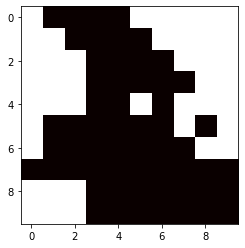

In [3]:
show(create_grid(rows=10, cols=10, p0=0.5, p=0.7))

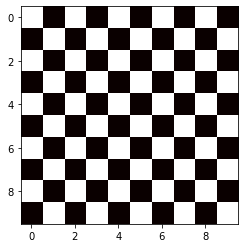

In [4]:
show(create_grid(rows=10, cols=10, p0=0.5, p=0.0001))

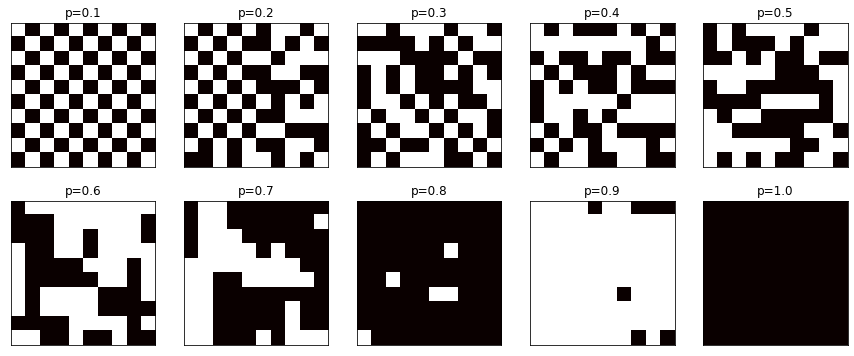

In [5]:
rows, cols, p0 = 10, 10, 0.5
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
p = 0.1
for i in range(5):
    grid = create_grid(rows, cols, p0, p)
    ax = axs[0, i]
    ax.imshow(grid, cmap='hot', interpolation='nearest')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_title(f'p=%0.1f' % p)
    p += 0.1
for i in range(5):
    grid = create_grid(rows, cols, p0, p)
    ax = axs[1, i]
    ax.imshow(grid, cmap='hot', interpolation='nearest')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_title(f'p=%0.1f' % p)
    p += 0.1
plt.show()

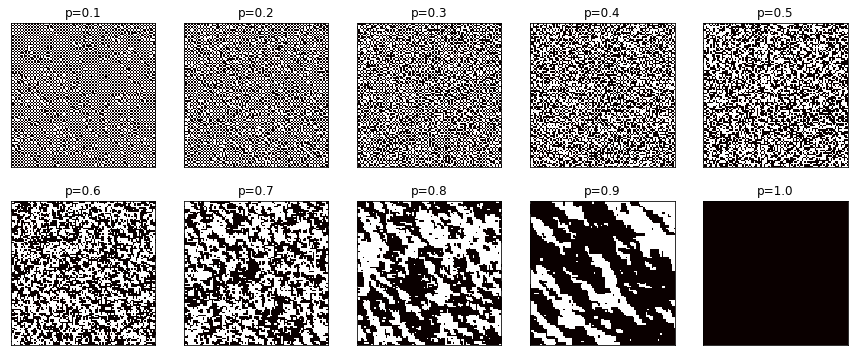

In [6]:
rows, cols, p0 = 100, 100, 0.5
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
p = 0.1
for i in range(5):
    grid = create_grid(rows, cols, p0, p)
    ax = axs[0, i]
    ax.imshow(grid, cmap='hot', interpolation='nearest')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_title(f'p=%0.1f' % p)
    p += 0.1
for i in range(5):
    grid = create_grid(rows, cols, p0, p)
    ax = axs[1, i]
    ax.imshow(grid, cmap='hot', interpolation='nearest')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_title(f'p=%0.1f' % p)
    p += 0.1
plt.show()

In [7]:
num_simulations = 100
rows, cols, p0, p = 100, 100, 0.5, 0.7
same, total = 0, 0
for _ in range(num_simulations):
    grid = create_grid(rows, cols, p0, p)
    for i in range(0, rows-1):
        for j in range(0, cols-1):
            if grid[i, j] == grid[i+1, j]:
                same += 1
            if grid[i, j] == grid[i, j+1]:
                same += 1
            total += 2
measured_p = same/total
print(f'Ran {num_simulations} Monte Carlo simulations for grid size {rows}x{cols} with p={p}, measured p was {measured_p:.2}')

Ran 100 Monte Carlo simulations for grid size 100x100 with p=0.7, measured p was 0.7


(0.48, 1.0)

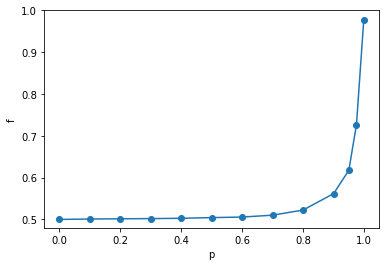

In [8]:
rows, cols, p0 = 100, 100, 0.5
num_samples = 100
pairs = []
for p in [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.999]:
    rs = []
    for _ in range(num_samples):
        grid = create_grid(rows, cols, p0, p)
        r = np.sum(grid)/(rows*cols)
        r = max(r, 1-r)
        rs.append(r)
    pairs.append((p, np.mean(rs)))
plt.plot([x[0] for x in pairs], [x[1] for x in pairs], marker='o')
plt.xlabel('p')
plt.ylabel('f')
plt.ylim((0.48, 1.0))

In [10]:
def entropy(frequencies, base=2):
    return -1 * sum([f/sum(frequencies) * log(f/sum(frequencies), base) for f in frequencies])

def spin_glass_entropy(rows, cols, p0, p, num_samples):
    frequencies = Counter()
    for _ in range(num_samples):
        grid = create_grid(rows, cols, p0, p)    
        frequencies[str(np.packbits(grid))] += 1
    return entropy(frequencies.values())

(0.0, 18.0)

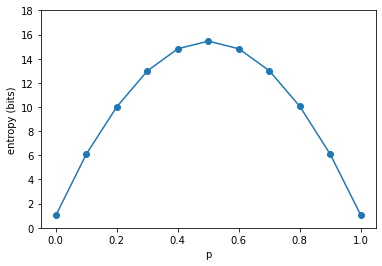

In [11]:
pairs = []
for p in [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]:
    h = spin_glass_entropy(rows=4, cols=4, p0=0.5, p=p, num_samples=100*1000)
    pairs.append((p, h))
plt.plot([x[0] for x in pairs], [x[1] for x in pairs], marker='o')
plt.xlabel('p')
plt.ylabel('entropy (bits)')
plt.ylim((0, 18))